In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv("mushrooms.csv")

In [8]:
data.dtypes
data.info
data.columns
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=list(data.columns)

In [11]:
l
for lst in l:
    data[lst]=le.fit_transform(data[lst].astype(str))

In [13]:
data.head()
data.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [16]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
z=np.abs(zscore(data))
thr=3
data_mod=data[(z<3).all(axis=1)]

In [20]:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

<AxesSubplot:>

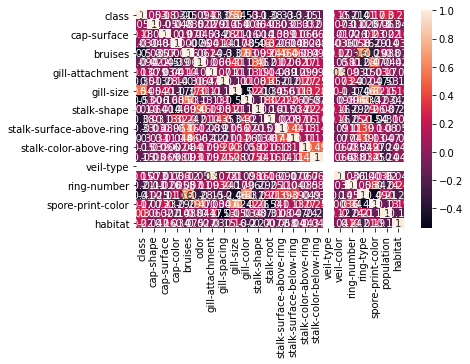

In [23]:
corrmat=data.corr()
import seaborn as sns
sns.heatmap(corrmat, annot=True)

In [27]:
X=data.drop(columns="class")
y=data["class"]

In [29]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train,y_test=split(X,y,test_size=.2,random_state=123)

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred=lr.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score as score
score(y_test,y_pred)

0.9513846153846154

In [36]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(y_test,y_pred))

0.22048896710580468

In [40]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
fpr,tpr,thr=roc_curve(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       863
           1       0.95      0.94      0.95       762

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



0.95100409667795